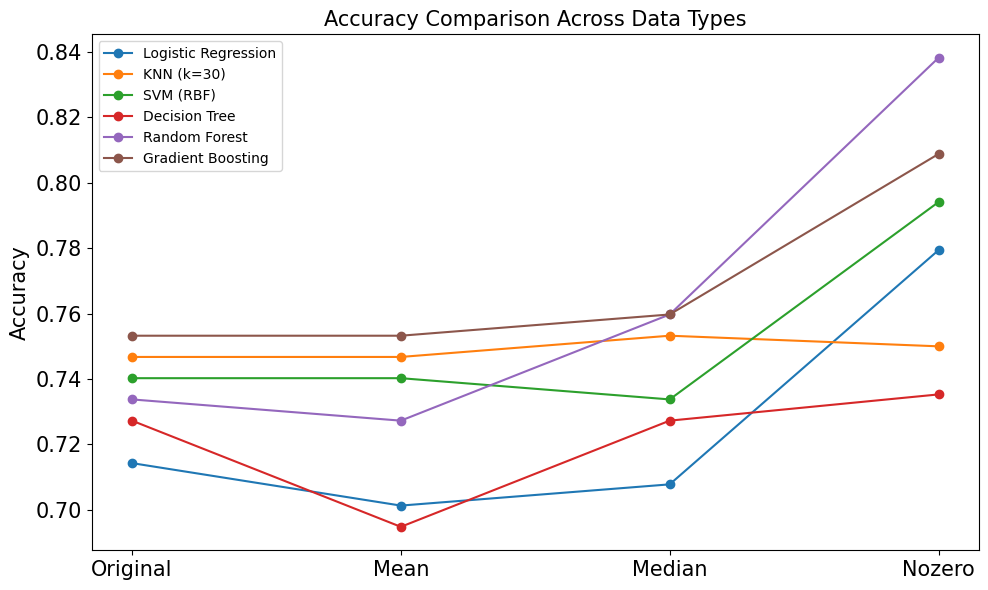

In [1]:

from numpy import size
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1. CSV 불러오기 (원하는 파일명으로 바꿔서 사용)
# -------------------------------------------------------
df_original = pd.read_csv("zero_model_accuracy.csv")
df_mean     = pd.read_csv("mean_model_accuracy.csv")
df_median   = pd.read_csv("median_model_accuracy.csv")
df_nozero   = pd.read_csv("nozero_model_accuracy.csv")

# -------------------------------------------------------
# 2. Accuracy만 추출해서 하나의 DataFrame으로 묶기
# -------------------------------------------------------
models = df_original["Model"]

accuracy_df = pd.DataFrame({
    "Model": models,
    "Original": df_original["Accuracy"],
    "Mean": df_mean["Accuracy"],
    "Median": df_median["Accuracy"],
    "Nozero": df_nozero["Accuracy"]
})

accuracy_df.set_index("Model", inplace=True)
accuracy_df.to_csv("final_models_accuracy.csv", index=1)

# -------------------------------------------------------
# 3. 모델별 Accuracy 라인 그래프
#   x축: Original / Mean / Median
#   y축: Accuracy 값
# -------------------------------------------------------
plt.figure(figsize=(10, 6))

for model in accuracy_df.index:
    plt.plot(
        ["Original", "Mean", "Median", "Nozero"],
        accuracy_df.loc[model],
        marker='o',
        label=model
    )

#plt.xlabel("Data Type", fontsize = 15)
plt.xticks(fontsize= 15)
plt.yticks(fontsize=15)
plt.ylabel("Accuracy", fontsize = 15)
plt.title("Accuracy Comparison Across Data Types", fontsize=15)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
